## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import time
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

## Import Project Datasets (Spring)


In [2]:
#All projects are imported here one by one
#variables are adjusted by the sprint progress (30%,50%,80%)
spring_issue_30 = pd.read_csv("Spring/spring_issue_80.csv") #sprint issues at xx% progress
spring_iter_30 = pd.read_csv("Spring/spring_iteration_80.csv") #sprint at xx% progress

In [3]:
#check data dimension of iteration
spring_iter_30.shape

(476, 19)

In [4]:
#check data dimension of issues
spring_issue_30.shape

(17497, 14)

## Data Preprocessing

### Drop unneccesary colums


In [5]:
#columns below are irrelevant with the available dataset
spring_issue_30.drop(['no_issuelink', 'gunning_fog'], axis=1, inplace=True)
spring_issue_30.head()

boardid  sprintid            type  priority  no_comment  no_affectversion  \
0        5         7           Story   Blocker           1                 0   
1        5         7           Story   Blocker           1                 0   
2        5         7           Story  Critical           0                 0   
3        5         7           Story   Blocker           0                 0   
4        5         7  Technical task  Critical           0                 0   

   no_fixversion  no_blocking  no_blockedby  no_fixversion_change  \
0              1            0             0                     1   
1              1            0             0                     1   
2              1            0             0                     1   
3              1            0             0                     0   
4              0            0             0                     0   

   no_priority_change  no_des_change  
0                   0              0  
1                   0              0  
2                   0              0  
3                   0              0  
4                   0              0

In [6]:
#X = spring_iter_30['vel_diff','planday','no_issue_starttime','vel_starttime','no_issue_added',
#'vel_added','no_issue_removed','vel_removed','no_issuetodo','vel_todo','no_issueinprogress',
#'vel_inprogress','no_issuedone','vel_done','no_admin','no_teammember']
#Y = spring_iter_30['vel_diff','planday','no_issue_starttime','vel_starttime','no_issue_added',
#'vel_added','no_issue_removed','vel_removed','no_issuetodo','vel_todo','no_issueinprogress',
#'vel_inprogress','no_issuedone','vel_done','no_admin','no_teammember']
#col_drop = ['boardid','sprintid','name','vel_diff']
#X = spring_iter_30.drop(col_drop,axis=1)
#Y = spring_iter_30['vel_diff']

#X = pd.get_dummies(X, prefix_sep='_')
#Y = LabelEncoder().fit_transform(Y)
#X = StandardScaler().fit_transform(X)

In [7]:
# def forest_test(X, Y):
#     X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, 
#                                                         test_size = 0.30, 
#                                                         random_state = 10)
#     start = time.process_time()
#     trainedforest = RandomForestClassifier(n_estimators=300).fit(X_Train,Y_Train)
#     print(time.process_time() - start)
#     predictionforest = trainedforest.predict(X_Test)
#     accuracy(Y_Test,predictionforest)

In [8]:
#forest_test(X, Y)

### Altering issue dataset for building the prediction model

#### Encode "priority" Column

In [9]:
#change priority column, convert from categorical data to numerical data
cleanup_num = {"priority" : {"Trivial":1,"Minor":2,"Major":3,"Critical":4,"Blocker":5}
}
spring_issue_30 = spring_issue_30.replace(cleanup_num)



#### Encode "type" Column

In [10]:
#creating columns with binary value related to issue type
issues_temp = pd.get_dummies(spring_issue_30[["type"]])


#### Merge Issue Dataset

In [11]:
spring_issue_30_merge = pd.concat([spring_issue_30,issues_temp],axis=1)
#drop original "type" column
spring_issue_30_merge.drop("type",axis=1,inplace=True)
spring_issue_30_merge.head()
#spring_issue_30_merge.shape

boardid  sprintid  priority  no_comment  no_affectversion  no_fixversion  \
0        5         7         5           1                 0              1   
1        5         7         5           1                 0              1   
2        5         7         4           0                 0              1   
3        5         7         5           0                 0              1   
4        5         7         4           0                 0              0   

   no_blocking  no_blockedby  no_fixversion_change  no_priority_change  \
0            0             0                     1                   0   
1            0             0                     1                   0   
2            0             0                     1                   0   
3            0             0                     0                   0   
4            0             0                     0                   0   

   no_des_change  type_Bug  type_Epic  type_Improvement  type_New Feature  \
0              0         0          0                 0                 0   
1              0         0          0                 0                 0   
2              0         0          0                 0                 0   
3              0         0          0                 0                 0   
4              0         0          0                 0                 0   

   type_Story  type_Task  type_Technical task  
0           1          0                    0  
1           1          0                    0  
2           1          0                    0  
3           1          0                    0  
4           0          0                    1

In [12]:
spring_issue_30_merge.columns

Index(['boardid', 'sprintid', 'priority', 'no_comment', 'no_affectversion',
       'no_fixversion', 'no_blocking', 'no_blockedby', 'no_fixversion_change',
       'no_priority_change', 'no_des_change', 'type_Bug', 'type_Epic',
       'type_Improvement', 'type_New Feature', 'type_Story', 'type_Task',
       'type_Technical task'],
      dtype='object')

#### Aggregate issue dataset by "boardid" & "sprintid" columns

In [13]:
aggr_spring_issue = spring_issue_30_merge.groupby(['boardid','sprintid']).mean()
aggr_spring_issue

priority  no_comment  no_affectversion  no_fixversion  \
boardid sprintid                                                          
5       7         3.800000    0.800000          0.000000       0.900000   
        12        2.411765    2.176471          0.764706       1.176471   
        14        2.421053    2.394737          0.552632       1.078947   
        17        2.473684    2.078947          0.763158       1.105263   
        22        2.285714    2.071429          0.619048       1.214286   
...                    ...         ...               ...            ...   
46      81        2.333333    4.833333          1.000000       0.666667   
        84        2.315789    1.894737          0.315789       1.842105   
        89        2.400000    4.000000          0.400000       0.600000   
        91        2.333333    3.133333          0.733333       1.266667   
        93        2.333333    3.200000          0.800000       0.600000   

                  no_blocking  no_blockedby  no_fixversion_change  \
boardid sprintid                                                    
5       7                 0.0           0.0              0.800000   
        12                0.0           0.0              0.882353   
        14                0.0           0.0              0.578947   
        17                0.0           0.0              0.842105   
        22                0.0           0.0              1.071429   
...                       ...           ...                   ...   
46      81                0.0           0.0              0.333333   
        84                0.0           0.0              0.368421   
        89                0.0           0.0              0.500000   
        91                0.0           0.0              0.733333   
        93                0.0           0.0              0.333333   

                  no_priority_change  no_des_change  type_Bug  type_Epic  \
boardid sprintid                                                           
5       7                   0.000000       0.100000  0.000000        0.0   
        12                  0.117647       0.529412  0.529412        0.0   
        14                  0.052632       0.552632  0.342105        0.0   
        17                  0.131579       0.552632  0.500000        0.0   
        22                  0.023810       0.571429  0.547619        0.0   
...                              ...            ...       ...        ...   
46      81                  0.000000       1.166667  0.333333        0.0   
        84                  0.105263       1.000000  0.210526        0.0   
        89                  0.200000       1.000000  0.500000        0.0   
        91                  0.333333       0.666667  0.466667        0.0   
        93                  0.266667       0.866667  0.466667        0.0   

                  type_Improvement  type_New Feature  type_Story  type_Task  \
boardid sprintid                                                              
5       7                 0.000000          0.000000         0.4   0.000000   
        12                0.176471          0.176471         0.0   0.117647   
        14                0.184211          0.131579         0.0   0.342105   
        17                0.289474          0.026316         0.0   0.184211   
        22                0.166667          0.142857         0.0   0.142857   
...                            ...               ...         ...        ...   
46      81                0.333333          0.166667         0.0   0.166667   
        84                0.263158          0.210526         0.0   0.315789   
        89                0.100000          0.300000         0.0   0.100000   
        91                0.066667          0.200000         0.0   0.266667   
        93                0.200000          0.200000         0.0   0.133333   

                  type_Technical task  
boardid sprintid                       
5       7                         0.6  
       

#### Join Iteration Dataset with Issue Dataset

In [14]:
joined_data = spring_iter_30.join(aggr_spring_issue,on=["boardid","sprintid"],how="inner")
joined_data

boardid  sprintid                       name  vel_diff  planday  \
0          5         7                   Sprint 1        -7       14   
1          5        12  Babbage - RC1 - Stage One         4       10   
2          5        14  Babbage - RC1 - Stage Two       -20       21   
3          5        17      The Road To SpringOne         0       30   
4          5        22        SpringOne Aftermath        -8       21   
..       ...       ...                        ...       ...      ...   
471       46        81             56 - Fowler GA         0       14   
472       46        84      57 - Fowler Aftermath        24       17   
473       46        89            58 - Gosling M1       -20       14   
474       46        91     59 - Evans / Fowler SR        -8       14   
475       46        93                Gosling RC1       -16       14   

     no_issue_starttime  vel_starttime  no_issue_added  vel_added  \
0                     4             17               0          0   
1                     1              4              15         60   
2                     5             20              33        132   
3                    23             92              14         56   
4                     0              0              38        152   
..                  ...            ...             ...        ...   
471                   3             12               0          0   
472                   5             20               2          8   
473                   6             24               2          8   
474                   7             28               3         12   
475                   7             28               3         12   

     no_issue_removed  ...  no_fixversion_change  no_priority_change  \
0                   0  ...              0.800000            0.000000   
1                   8  ...              0.882353            0.117647   
2                   0  ...              0.578947            0.052632   
3                   2  ...              0.842105            0.131579   
4                   0  ...              1.071429            0.023810   
..                ...  ...                   ...                 ...   
471                 0  ...              0.333333            0.000000   
472                 0  ...              0.368421            0.105263   
473                 0  ...              0.500000            0.200000   
474                 0  ...              0.733333            0.333333   
475                 0  ...              0.333333            0.266667   

     no_des_change  type_Bug  type_Epic  type_Improvement  type_New Feature  \
0         0.100000  0.000000        0.0          0.000000          0.000000   
1         0.529412  0.529412        0.0          0.176471          0.176471   
2         0.552632  0.342105        0.0          0.184211          0.131579   
3         0.552632  0.500000        0.0          0.289474          0.026316   
4         0.571429  0.547619        0.0          0.166667          0.142857   
..             ...       ...        ...               ...               ...   
471       1.166667  0.333333        0.0          0.333333          0.166667   
472       1.000000  0.210526        0.0          0.263158          0.210526   
473       1.000000  0.500000        0.0          0.100000          0.300000   
474       0.666667  0.466667        0.0          0.066667          0.200000   
475       0.866667  0.466667        0.0          0.200000          0.200000   

     type_Story  type_Task  type_Technical task  
0           0.4   0.000000                  0.6  
1           0.0   0.117647                  0.0  
2           0.0   0.342105                  0.0  
3           0.0   0.184211                  0.0  
4           0.0   0.142857                  0.0  
..          ...        ...                  ...  
471         0.0   0.166667                  0.0  
472         0.0   0.315789                  0.0  
473         0.0   0.100000                  0.0

### Check Number of Project Iterations

In [15]:
joined_data.shape

(476, 35)

In [16]:
#display counts of under/achieved/over iterations
def count_iter(joined_data):
    under = 0 #vel_diff < 0
    over = 0 #vel_diff > 0
    achieve = 0 #vel_diff = 0
    for i in range(len(joined_data)):
        if joined_data["vel_diff"].iloc[i] < 0:
            under += 1
        elif joined_data["vel_diff"].iloc[i] == 0:
            achieve += 1
        elif joined_data["vel_diff"].iloc[i] > 0:
            over += 1
    print('underachieving iterations: ',under)
    print('overachieving iterations: ',over)
    print('on target iterations: ',achieve)

count_iter(joined_data)

underachieving iterations:  155
overachieving iterations:  256
on target iterations:  65


## Building Prediction Model

### Feature Selection for Prediction Model

#### TEST FEATURE IMPORTANCE

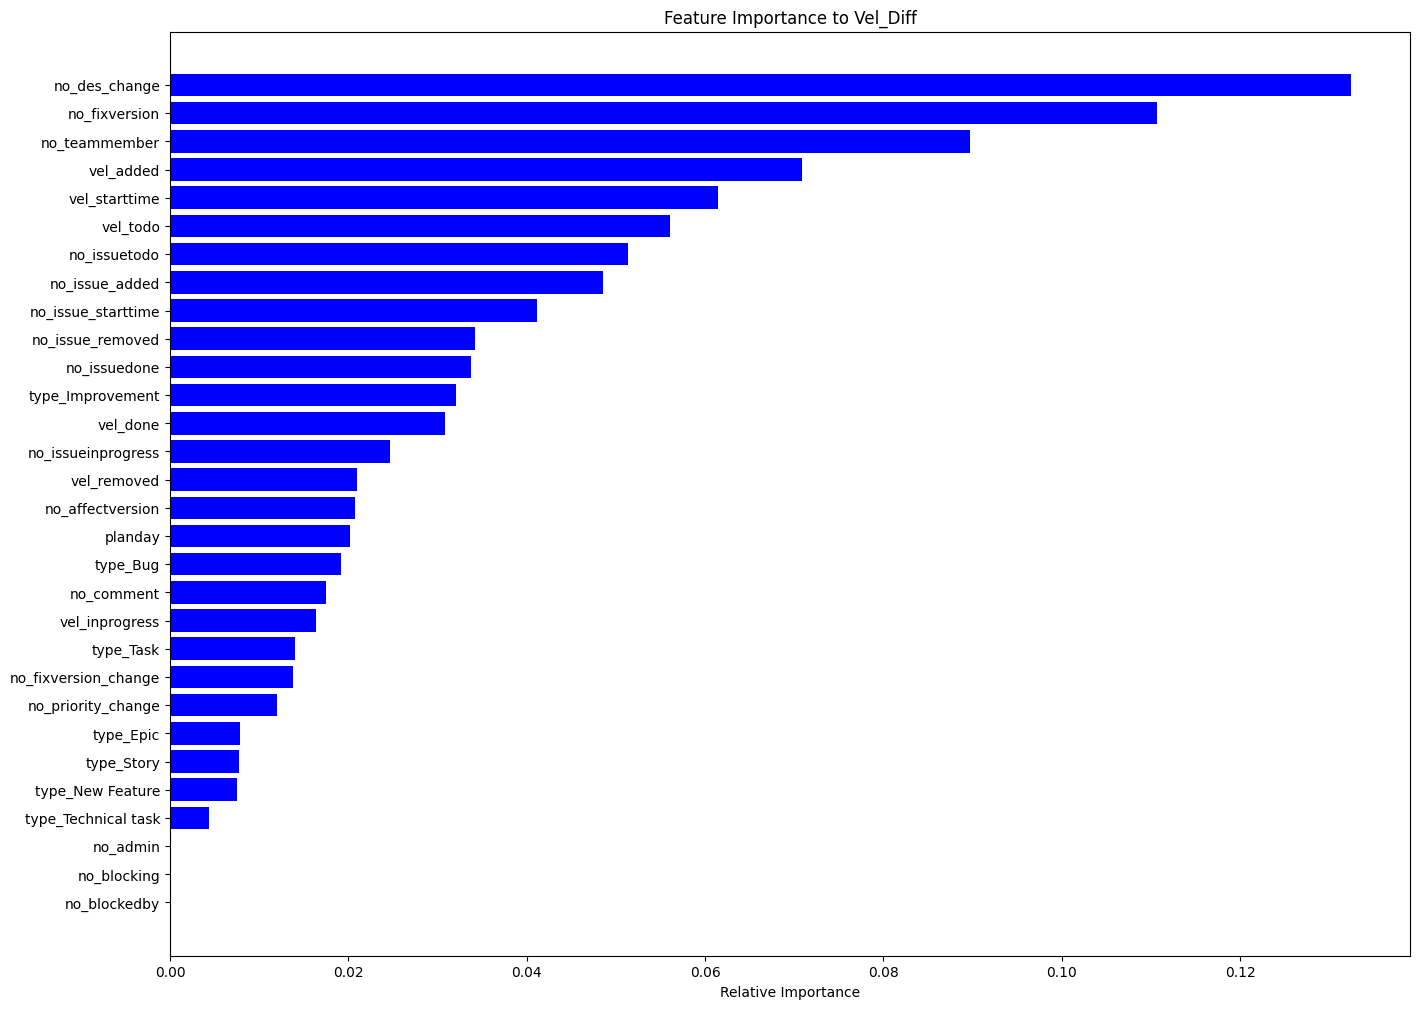

In [17]:
col_drop = ['name','vel_diff','boardid','sprintid','priority']
X = joined_data.drop(col_drop,axis=1)
Y = joined_data.loc[:,'vel_diff']
rfr = RandomForestRegressor()
rfr.fit(X, Y)
features = X.columns
importances = rfr.feature_importances_
indices = np.argsort(importances)  # sort result
plt.figure(figsize=(16,12))
plt.title('Feature Importance to Vel_Diff')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [18]:
joined_data.columns

Index(['boardid', 'sprintid', 'name', 'vel_diff', 'planday',
       'no_issue_starttime', 'vel_starttime', 'no_issue_added', 'vel_added',
       'no_issue_removed', 'vel_removed', 'no_issuetodo', 'vel_todo',
       'no_issueinprogress', 'vel_inprogress', 'no_issuedone', 'vel_done',
       'no_admin', 'no_teammember', 'priority', 'no_comment',
       'no_affectversion', 'no_fixversion', 'no_blocking', 'no_blockedby',
       'no_fixversion_change', 'no_priority_change', 'no_des_change',
       'type_Bug', 'type_Epic', 'type_Improvement', 'type_New Feature',
       'type_Story', 'type_Task', 'type_Technical task'],
      dtype='object')

#### TEST FEATURE CORRELATION

<Axes: >

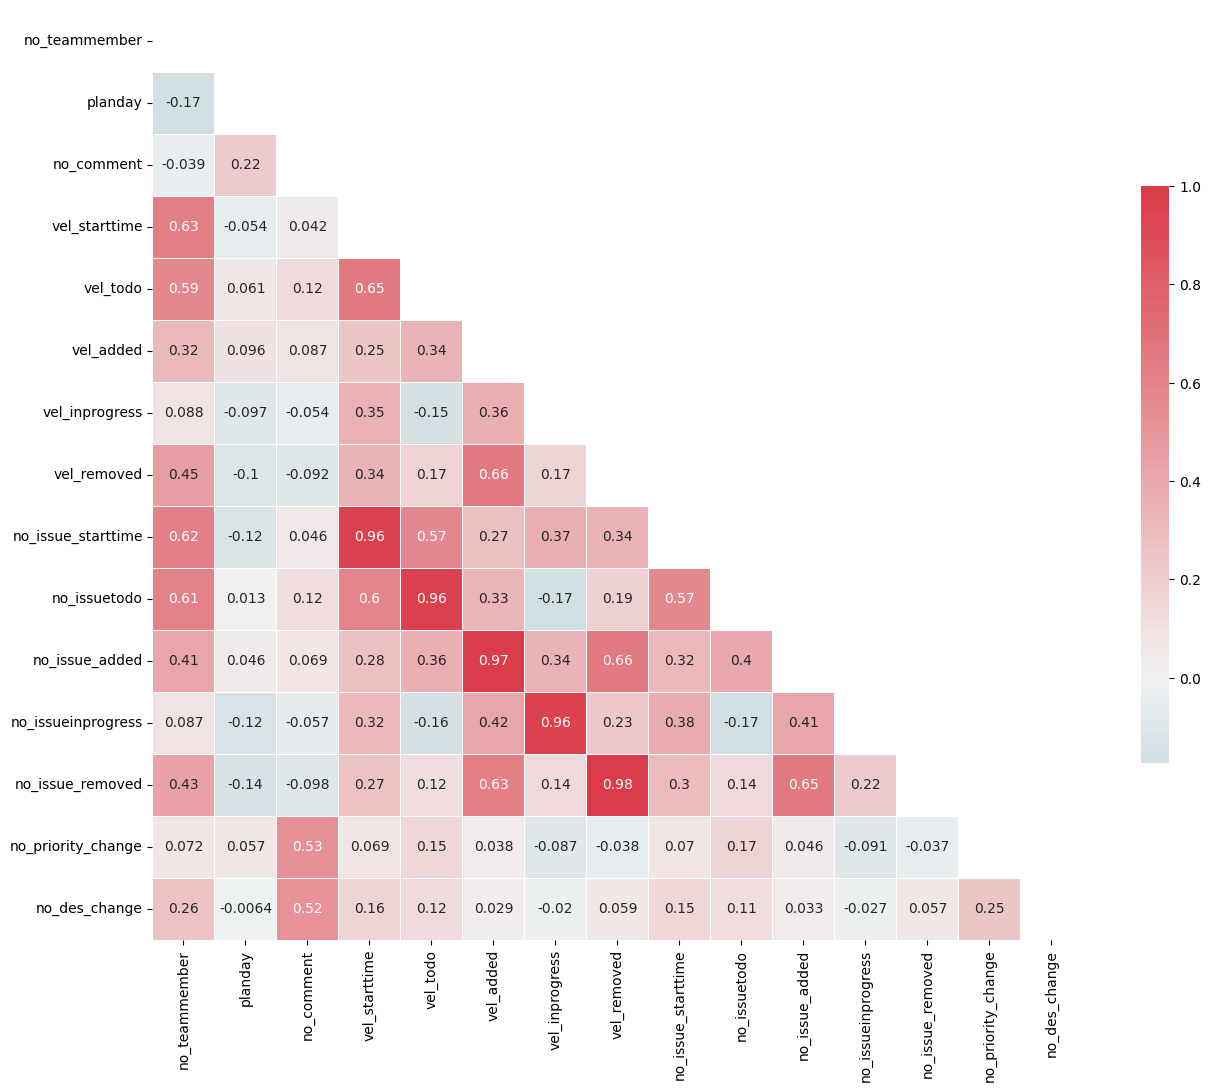

In [19]:
##Correlation analysis
#Correlation plot
df_corr = X.loc[:,['no_teammember', 'planday','no_comment','vel_starttime', 'vel_todo', 'vel_added', 
       'vel_inprogress', 'vel_removed','no_issue_starttime',  'no_issuetodo', 'no_issue_added', 
       'no_issueinprogress','no_issue_removed','no_priority_change','no_des_change']]
#Set the width and height of the plot
f, ax = plt.subplots(figsize=(15, 15))

#Generate correlation matrix
corr = df_corr.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Determining the Best Prediction Model

#### Define Accuracy Function

In [20]:
def accuracy(y_actual, y_pred):
    acc = {} # store accuracy
    r2 = metrics.r2_score(y_actual, y_pred)
    mae = metrics.mean_absolute_error(y_actual,y_pred)
    rmse = metrics.mean_squared_error(y_actual, y_pred, squared=False)
    acc['r2'] = r2
    acc['mae'] = mae
    acc['rmse'] = rmse
    print('r2 score:',r2)
    print("MAE:",mae)
    print("RMSE:",rmse)

### StandarScale Data

In [21]:
#final_feature = X.loc[:,['planday', 'vel_todo', 'no_teammember', 'vel_starttime', 'no_issue_starttime']]
X_scaled = StandardScaler().fit_transform(df_corr)

#### Data Split

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=0.2,random_state=10)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.2,random_state=10)
print('Number of train data:',len(X_train))
print('Number of validation data:',len(X_val))
print('Number of test data:',len(X_test))

Number of train data: 304
Number of validation data: 76
Number of test data: 96


### Prediction Model Selection

#### KNN

In [23]:
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 2}

In [24]:
knn = neighbors.KNeighborsRegressor(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_val)
accuracy(y_val, y_pred)

r2 score: 0.7080455320800023
MAE: 8.118421052631579
RMSE: 14.864077148403268


#### Decision Tree Regressor

In [25]:
dt = DecisionTreeRegressor(max_depth=200, random_state=1)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_val)
accuracy(y_val, y_pred)

r2 score: 0.6837330178958387
MAE: 7.365131578947368
RMSE: 15.470605617036934


#### Random Forest Regressor

In [26]:
#Create Prediction Model
#col_drop = ['boardid','sprintid','name','vel_diff']
#X = joined_data.loc[:,['vel_todo','no_teammember','vel_starttime', 'no_issue_starttime']]
#spring_iter_30.head()
#Y = joined_data.loc[:,"vel_diff"]
#X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

rfr = RandomForestRegressor(n_estimators=100, max_features='log2', max_depth=1000)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_val)

accuracy(y_val, y_pred_rfr)

r2 score: 0.7139152832785032
MAE: 9.395160892727844
RMSE: 14.713897168690591


In [27]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(rfr, X_train, y_train, cv=10, scoring=('r2', 'neg_mean_squared_error'),
                            return_train_score=True)
sorted(cv_results.keys())
cv_results['test_r2']
print("cross validate acc: ", np.mean(cv_results['test_r2']))

cross validate acc:  0.5073602697864577


## JADI GINI 

## Evaluate Prediction Model

In [28]:
y_test_pred = rfr.predict(X_test)
accuracy(y_test, y_test_pred)

r2 score: 0.7786371312662387
MAE: 11.942934187833544
RMSE: 19.88602535193639


In [29]:
y_test_pred = knn.predict(X_test)
accuracy(y_test, y_test_pred)

r2 score: 0.5829561047856358
MAE: 14.369791666666666
RMSE: 27.295212873933284


In [30]:
y_test_pred = dt.predict(X_test)
accuracy(y_test, y_test_pred)

r2 score: 0.3503687899013538
MAE: 12.164930555555557
RMSE: 34.06661969650491


In [31]:
joined_data.shape

(476, 35)

In [32]:
#display counts of under/achieved/over iterations
def count_iter(joined_data):
    under = 0 #vel_diff < 0
    over = 0 #vel_diff > 0
    achieve = 0 #vel_diff = 0
    for i in range(len(joined_data)):
        if joined_data["vel_diff"].iloc[i] < 0:
            under += 1
        elif joined_data["vel_diff"].iloc[i] == 0:
            achieve += 1
        elif joined_data["vel_diff"].iloc[i] > 0:
            over += 1
    print('underachieving iterations: ',under)
    print('overachieving iterations: ',over)
    print('on target iterations: ',achieve)

count_iter(joined_data)

underachieving iterations:  155
overachieving iterations:  256
on target iterations:  65
